# This notebook derives from the excellent (EXCELLENT!) tutorial by Andrej Karpathy

Make sure you have read and understand the material on derivatives, partial derivatives and chain rule before working on this<Br> 

<a href="https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&ab_channel=AndrejKarpathy">Micrograd Video</a><br>
<a href="https://github.com/karpathy/micrograd">Micrograd github repo</a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !pip install graphviz
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label,n.data, n.grad), shape='record')
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label,n.data), shape='record')
    
    # dot.node(name = uid, label = "{ %s }" % (n.label), shape='record')

    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
class Value:
    '''Stores a single scalar value and its gradient, as well as the operation that produced it, and a set of child Values
     eventually will also store the backward function for this node'''
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children) # set of child Values
        self._op = _op 
        self.label = label # optional label for the node

    def __repr__(self):
        return f"Value({self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    

In [30]:
a=Value(2.0, label='a')
b=Value(3.0, label='b')
# c=a*b;c.label='c'
d=a+b;d.label='d'
# e=c*d; e.label='e'
f=Value(-2.0, label='f')
L=d*f; L.label='L'

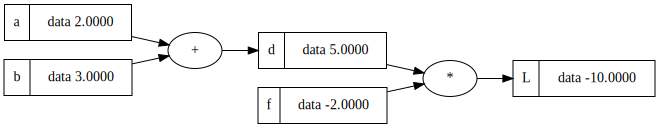

In [31]:
draw_dot(L)